In [3]:
# Some imports
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
from matplotlib.dates import DateFormatter
from dateutil import tz

In [11]:
%config InlineBackend.figure_format = 'retina'

In [36]:
def load_historic_weather_data():
    #https://mesonet.agron.iastate.edu/request/download.phtml?network=NY_ASOS
    weather_url = 'https://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?station=JFK&tz=Etc%2FUTC&data=tmpc&data=dwpc&data=relh&data=drct&data=sped&data=mslp&data=p01m&data=vsby&data=gust_mph&data=peak_wind_gust_mph&year1=2020&month1=1&day1=1&year2=2022&month2=12&day2=31&format=onlycomma&latlon=no&missing=empty&trace=empty&direct=no&report_type=1&report_type=2'
    w_df = pd.read_csv(weather_url)
    w_df = w_df[pd.notnull(w_df['tmpc'])]
    w_df['datetime'] = pd.to_datetime(w_df['valid'], format='%Y-%m-%d %H:%M', errors='ignore')
    w_df['datetime'] = w_df['datetime'].dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
    drop_arr = []
    for index, row in w_df.iterrows():
        if row['datetime'].minute != 51:
            drop_arr.append(index)
        else:
            w_df.at[index, 'datetime'] = row['datetime'] - timedelta(minutes=51)
    w_df.drop(drop_arr, inplace=True)
    w_df = w_df.drop_duplicates(subset=['datetime'])
    w_df.rename(columns={'p01m': 'precipitation_mm',
                         'sped': 'wind_speed_mph',
                         'relh': 'rh_percentage',
                         'tmpc': 'temp_celcius',
                         'dwpc': 'dewp_celcius',
                         'drct': 'wind_dir',
                         'mslp': 'sea_level_pressure_mb',
                         'vsby': 'visibility_miles'
                        }, inplace=True)
    return w_df

In [37]:
weather_data = load_historic_weather_data()

In [38]:
weather_data

,station,valid,temp_celcius,dewp_celcius,rh_percentage,wind_dir,wind_speed_mph,sea_level_pressure_mb,precipitation_mm,visibility_miles,gust_mph,peak_wind_gust_mph,datetime
11,JFK,2020-01-01 00:51,6.11,3.89,85.66,210.0,10.35,1003.7,0.00,10.0,NaN,NaN,2019-12-31 19:00:00-05:00
24,JFK,2020-01-01 01:51,6.72,4.39,85.06,250.0,17.25,1004.2,0.00,10.0,NaN,NaN,2019-12-31 20:00:00-05:00
37,JFK,2020-01-01 02:51,6.11,1.72,73.45,270.0,14.95,1003.9,NaN,10.0,NaN,33.35,2019-12-31 21:00:00-05:00
50,JFK,2020-01-01 03:51,6.11,1.11,70.30,270.0,17.25,1004.0,0.00,10.0,20.7,NaN,2019-12-31 22:00:00-05:00
63,JFK,2020-01-01 04:51,5.61,0.00,67.17,270.0,14.95,1004.4,0.00,10.0,NaN,NaN,2019-12-31 23:00:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158868,JFK,2021-07-21 16:51,28.89,17.22,49.32,330.0,11.50,1011.7,0.00,8.0,NaN,NaN,2021-07-21 12:00:00-04:00
158882,JFK,2021-07-21 17:51,22.78,20.00,84.34,330.0,10.35,1011.6,0.51,7.0,NaN,NaN,2021-07-21 13:00:00-04:00
158896,JFK,2021-07-21 18:51,26.72,18.89,62.17,360.0,9.20,1011.4,0.25,10.0,NaN,NaN,2021-07-21 14:00:00-04:00
158908,JFK,2021-07-21 19:51,26.72,18.28,59.83,20.0,6.90,1011.6,0.00,10.0,NaN,NaN,2021-07-21 15:00:00-04:00


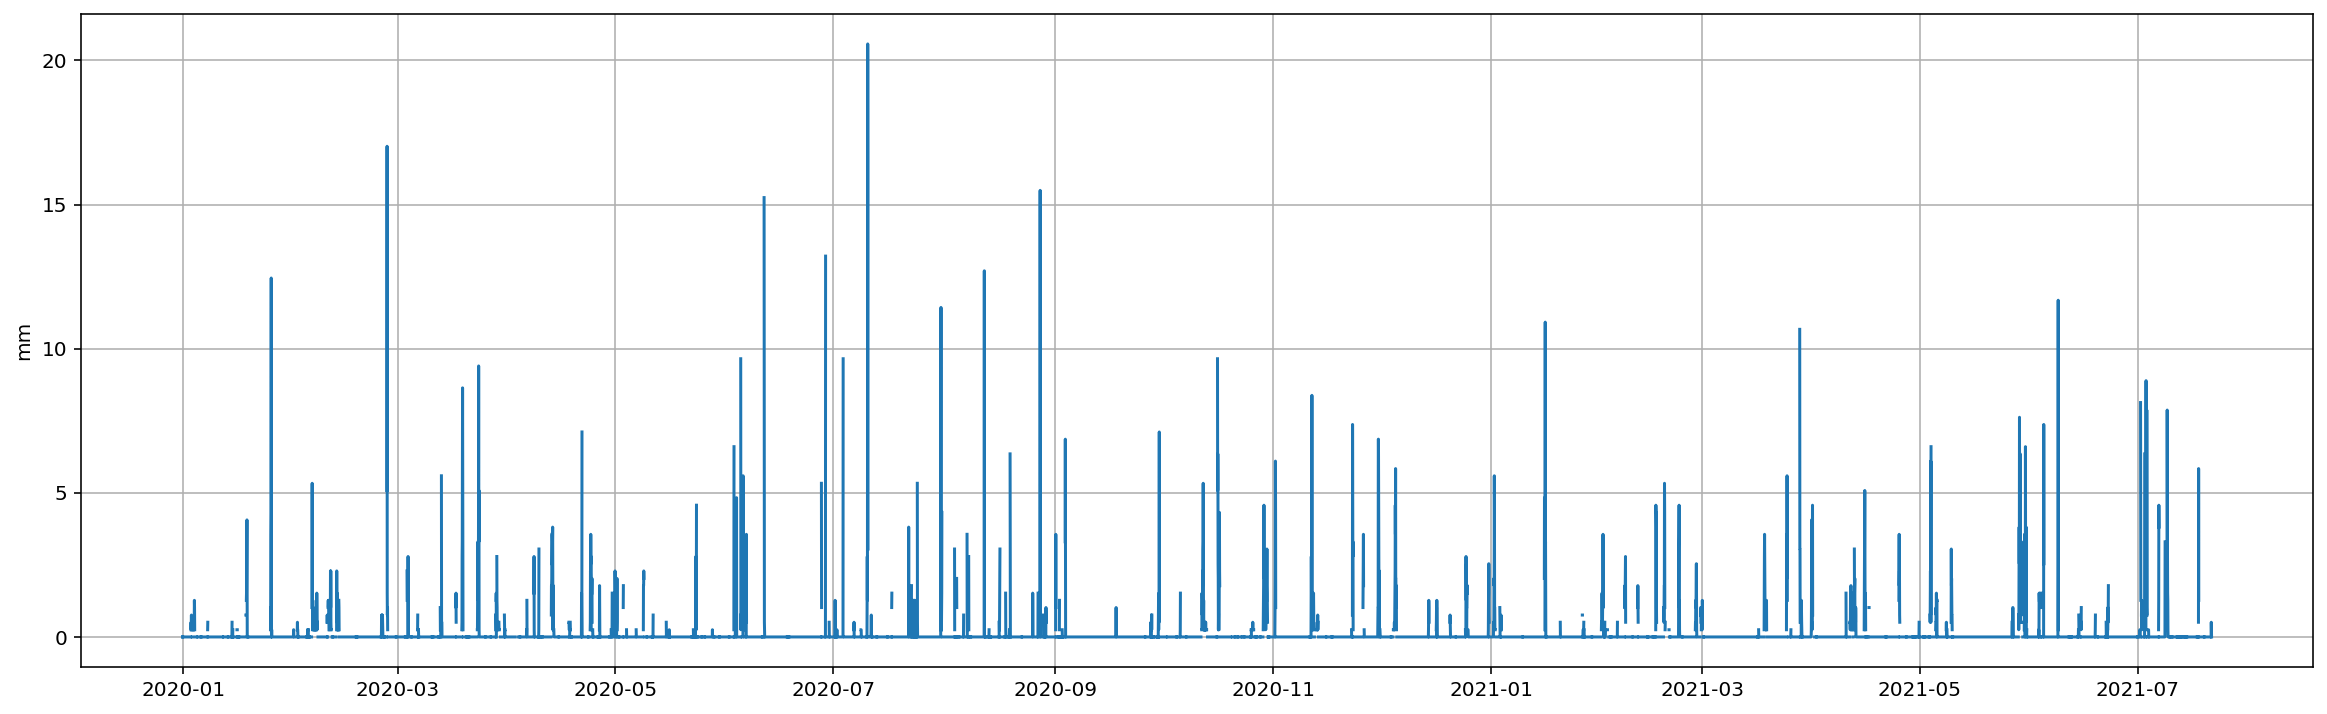

In [39]:
plt.figure(figsize = (20, 6))
plt.plot(weather_data["datetime"], weather_data["precipitation_mm"])
plt.ylabel("mm")
plt.grid(True)